** ANS 1**                                       

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import adfuller,kpss

Defining ADF,KPSS, mean and autocovariance functions. Some of them are going to use in every case so I will call these functions from respective parts.

ADF Test function

In [146]:
def adf_test(atr):
    #Perform Dickey-Fuller test:
    timeseries = atr
    print ('Results of Dickey-Fuller Test \n')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

KPSS Test function

In [147]:
def kpss_test(atr):
    print ('Results of KPSS Test \n')
    kpsstest = kpss(atr, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

mean function

In [148]:
def meanfunction(a):
  sum=0
  for i in a:
    sum += i
  meanvalue = sum/len(a)
  return meanvalue

autocovariance function

In [149]:
def autocovariance(a,N,k,m):  # N=length of data, k=lag, m=mean
    autoCov = 0
    for i in np.arange(0, N-k):
        autoCov += ((a[i+k])-m)*(a[i]-m)
    return (1/(N-1))*autoCov

Random error terms for each cases


In [150]:
# error term generating 
mu, sigma = 0, 1 # mean and standard deviation
error_term = np.random.normal(mu, sigma, 104)

## **CASE A:**

In [151]:
# time series data 
y = []
for i in range(100):  
  yt = error_term[i+3] - error_term[i]
  y.append(yt)

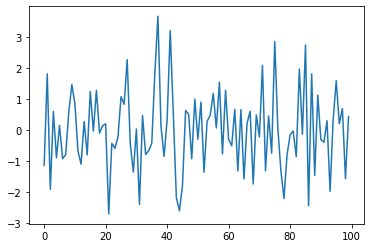

In [152]:
plt.plot(y)

ACF PACF Plot

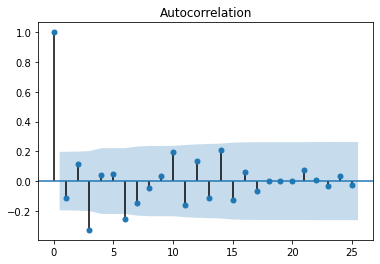

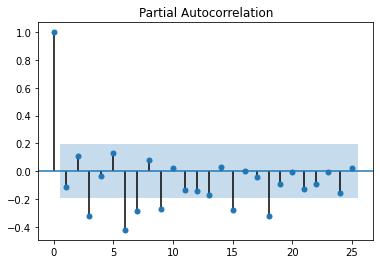

In [153]:
plot_acf(y, lags = 25)
plt.show()
plot_pacf(y, lags = 25)
plt.show()

Only at lag 3 autocorelation value is outside the significant value so we can say that the series is stationary from ACF plot. To confirm Below is the result of ADF,KPSS test.

In [154]:
adf_test(y)

Results of Dickey-Fuller Test 

Test Statistic                 -5.624009
p-value                         0.000001
#Lags Used                      8.000000
Number of Observations Used    91.000000
Critical Value (1%)            -3.504343
Critical Value (5%)            -2.893866
Critical Value (10%)           -2.584015
dtype: float64


From ADF test we got p value 0.000166 which is lesser than 0.05 so we can say that series is stationary.  

In [155]:
kpss_test(y)

Results of KPSS Test 

Test Statistic            0.086049
p-value                   0.100000
Lags Used                12.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


ADF Test : The test statistic is less than the critical value, so we can reject the null hypothesis. So we can say that it is stationary series.

Kpss Test : The test statistic is less than the critical value so we fail to reject the null hypothesis. So we can say that it is stationary series.

Both tests are giving stationary so series is stationary.

In [156]:
# mean and autocovariance values

m = meanfunction(y)
print('mean of the generated series is', meanfunction(y))
print("Autocovariance:", autocovariance(y, len(y), 1, m))

mean of the generated series is -0.008032819544621346
Autocovariance: -0.1931175124593063


## **CASE B:**

In [157]:
# time series data 
yb = [3,5]
for i in range(2,102):  
  yt = yb[i-1] + (0.9*yb[i-2]) + error_term[i]
  yb.append(yt)
del yb[0:2]

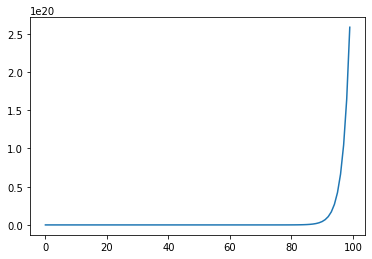

In [158]:
plt.plot(yb)

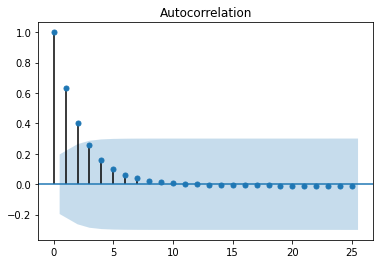

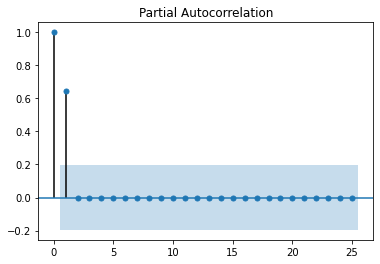

In [159]:
plot_acf(yb, lags = 25)
plt.show()
plot_pacf(yb, lags = 25)
plt.show()

In [160]:
adf_test(yb)

Results of Dickey-Fuller Test 

Test Statistic                 2.486702e+17
p-value                        1.000000e+00
#Lags Used                     5.000000e+00
Number of Observations Used    9.400000e+01
Critical Value (1%)           -3.501912e+00
Critical Value (5%)           -2.892815e+00
Critical Value (10%)          -2.583454e+00
dtype: float64


Upto lag 2, ACF value is significant and also from data plot we can tell that given series is non-stationary. 
Also from ADF test, P value is 1 so it is non-stationary.

## **CASE C:**

In [161]:
# time series data 
yc = list(np.random.randint(0,20,4))
for i in range(4,104):  
  yt = (0.7 * yc[i-1]) + (0.2*yc[i-2]) - (0.1*yc[i-3]) - (0.3*yc[i-4]) + error_term[i]
  yc.append(yt)
del yc[0:4]

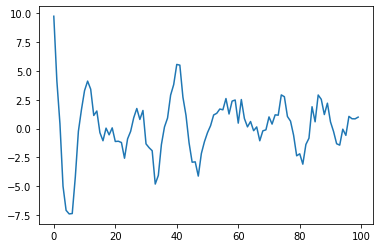

In [162]:
plt.plot(yc)

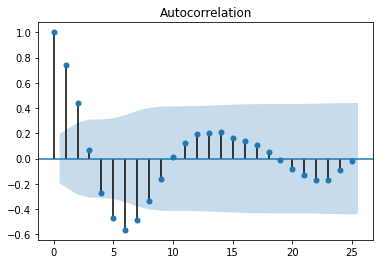

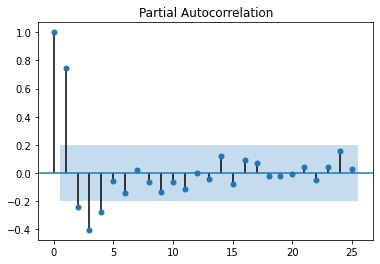

In [163]:
plot_acf(yc, lags = 25)
plt.show()
plot_pacf(yc, lags = 25)
plt.show()

almost every value is under the significant range so we can say that the series is stationary from ACF plot. To confirm Below is the result of ADF,KPSS test.

In [164]:
adf_test(yc)

Results of Dickey-Fuller Test 

Test Statistic                -9.344861e+00
p-value                        8.600674e-16
#Lags Used                     3.000000e+00
Number of Observations Used    9.600000e+01
Critical Value (1%)           -3.500379e+00
Critical Value (5%)           -2.892152e+00
Critical Value (10%)          -2.583100e+00
dtype: float64


From ADF test we got p value 0.001 which is lesser than 0.05 so we can say that series is stationary.  

In [165]:
kpss_test(yc)

Results of KPSS Test 

Test Statistic            0.232869
p-value                   0.100000
Lags Used                12.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


ADF Test : The test statistic is less than the critical value, so we can reject the null hypothesis. So we can say that it is stationary series.

Kpss Test : The test statistic is less than the critical value so we fail to reject the null hypothesis. So we can say that it is stationary series.

Both tests are giving stationary so series is stationary.

In [166]:
# mean and autocovariance values

mc = meanfunction(yc)
print('mean of the generated series is', meanfunction(yc))
print("Autocovariance:", autocovariance(yc, len(yc), 3, mc))

mean of the generated series is 0.17404339181621747
Autocovariance: 0.4752718881331392


## **CASE D:**

In [167]:
# time series data 
yd = []
t = 1
for i in range(100):  
  yt = t + error_term[i]
  t += 1
  yd.append(yt)

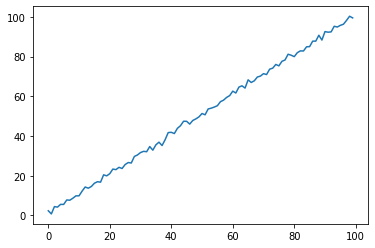

In [168]:
plt.plot(yd)

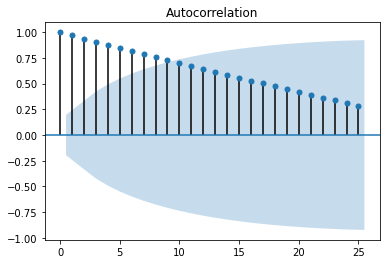

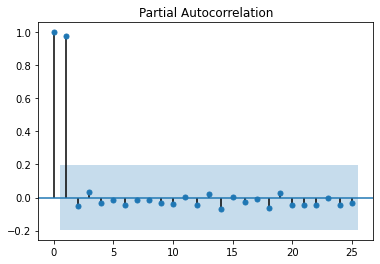

In [169]:
plot_acf(yd, lags = 25)
plt.show()
plot_pacf(yd, lags = 25)
plt.show()

Upto lag 9, ACF value is significant and also It is decreasing slowly which shows that the series is non-stationary. 

In [170]:
adf_test(yd)

Results of Dickey-Fuller Test 

Test Statistic                  0.059968
p-value                         0.963219
#Lags Used                      9.000000
Number of Observations Used    90.000000
Critical Value (1%)            -3.505190
Critical Value (5%)            -2.894232
Critical Value (10%)           -2.584210
dtype: float64


From ADF test we got p value 0.959 which is greater than 0.05 so we can say that series is non-stationary.

## **CASE E:**

In [171]:
# time series data 
ye = []
for i in range(100):  
  yt = error_term[i]
  ye.append(yt)

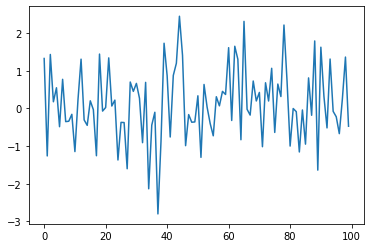

In [172]:
plt.plot(ye)

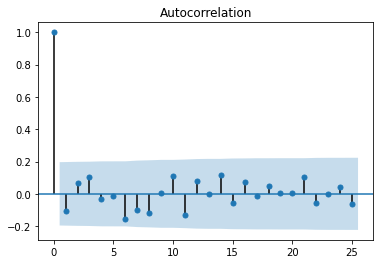

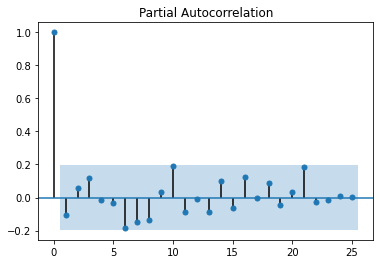

In [173]:
plot_acf(ye, lags = 25)
plt.show()
plot_pacf(ye, lags = 25)
plt.show()

almost every value is under the significant value range so we can say that the series is stationary from ACF plot. To confirm Below is the result of ADF,KPSS test.

In [174]:
adf_test(ye)

Results of Dickey-Fuller Test 

Test Statistic                -1.101630e+01
p-value                        6.144679e-20
#Lags Used                     0.000000e+00
Number of Observations Used    9.900000e+01
Critical Value (1%)           -3.498198e+00
Critical Value (5%)           -2.891208e+00
Critical Value (10%)          -2.582596e+00
dtype: float64


From ADF test we got p value 0.00 which is lesser than 0.05 so we can say that series is stationary.


In [175]:
kpss_test(ye)

Results of KPSS Test 

Test Statistic            0.202813
p-value                   0.100000
Lags Used                12.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


The test statistic in kpss test is less than the critical value so we fail to reject the null hypothesis. So we can say that it is stationary series.

In [176]:
# mean and autocovariance values

me = meanfunction(ye)
print('mean of the generated series is', meanfunction(ye))
print("Autocovariance:", autocovariance(ye, len(ye), 1, me))

mean of the generated series is 0.12191926909591996
Autocovariance: -0.10008606258840692


## **CASE F:**

In [177]:
# time series data 
yf = []
for i in range(100):  
  yt = (error_term[i+2] * error_term[i])
  yf.append(yt)

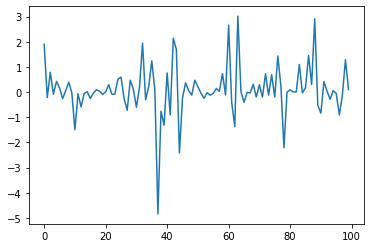

In [178]:
plt.plot(yf)

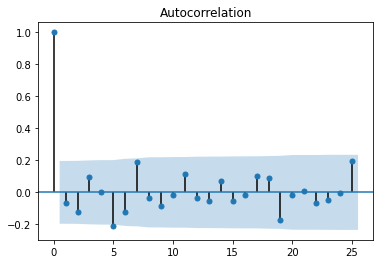

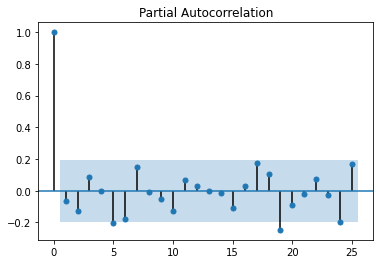

In [179]:
plot_acf(yf, lags = 25)
plt.show()
plot_pacf(yf, lags = 25)
plt.show()

almost every value is under the significant value range so we can say that the series is stationary from ACF plot. To confirm Below is the result of ADF,KPSS test.

In [180]:
adf_test(yf)

Results of Dickey-Fuller Test 

Test Statistic                -8.107493e+00
p-value                        1.251425e-12
#Lags Used                     1.000000e+00
Number of Observations Used    9.800000e+01
Critical Value (1%)           -3.498910e+00
Critical Value (5%)           -2.891516e+00
Critical Value (10%)          -2.582760e+00
dtype: float64


From ADF test we got p value 0.00 which is lesser than 0.05 so we can say that series is stationary.

In [181]:
kpss_test(yf)

Results of KPSS Test 

Test Statistic            0.184567
p-value                   0.100000
Lags Used                12.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


The test statistic in kpss test is less than the critical value so we fail to reject the null hypothesis. So we can say that it is stationary series.

In [182]:
# mean and autocovariance values

mf = meanfunction(yf)
print('mean of the generated series is', meanfunction(yf))
print("Autocovariance:", autocovariance(yf, len(yf), 1, mf))

mean of the generated series is 0.08904256363399882
Autocovariance: -0.06438042130781019
